# Section 1: What is Data analysis?

### Definition

Gathering, transforming, inspecting, modelling data in order to extract useful information, make conclusions.

### Existing tools

- auto-managed tools 
    - need to buy and then can use right away
    - ex: tableau, looker, excell
- programming languages
    - ex: python, R, Julia
    
### Process

1. Data Extraction
Comes from your own data base, web API

2. Data Cleaning
If source is own data base then probably already in shape. Using external sources, will need to do more work here

3. Data Wrangling
Rearrange data for better analysis. Making tables, combining data for multiple sources, etc.

4. Analysis
extracting patterns from clean and in shape data. Statistical analysis is fundamental

5. Action
Can implement machine learning models, build reports, support decision making.

### Data Analysis vs Data Science

Boundaries are not very clear. Analists have more communication qualities, scientists have more math based knowledge.

### Python & PyData Ecosystem

#### Most importat libraries
- pandas: data analysis
- matplotlib and seaborn for visualization

#### Thought process
don't have constant visual reference of data that we have, therefore can work with millions of data points at once.

# Section 2: Real example Data Analysis

Just a glance, real explanations on next sections

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#seeing what data looks like
!head /Users/rebeccaceppas/code/data-analysis-course/sales_data.csv

In [9]:
#reading the csv into python 
sales = pd.read_csv(
    '/Users/rebeccaceppas/code/data-analysis-course/sales_data.csv',
    parse_dates=['Date'])

### The data at a glance

In [10]:
sales.head()

Date  Day     Month  Year  Customer_Age       Age_Group  \
0 2013-11-26   26  November  2013            19     Youth (<25)   
1 2015-11-26   26  November  2015            19     Youth (<25)   
2 2014-03-23   23     March  2014            49  Adults (35-64)   
3 2016-03-23   23     March  2016            49  Adults (35-64)   
4 2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               8         45         120     590   360   
1  Hitch Rack - 4-Bike               8         45         120     590   360   
2  Hitch Rack - 4-Bike              23         45         120    1366  1035   
3  Hitch Rack - 4-Bike              20         45         120    1188   900   
4  Hitch Rack - 4-Bike               4         45         120     238   180   

   Revenue  
0      950  
1      950  
2     2401  
3     2088  
4      418

This gives us the data frame, each column has data type.

In [11]:
sales.shape

(113036, 18)

Tells us how many (rows, columns)

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

Quickly understand the properties of data we are using. Tells you name of columns and data type in each column. Idea of the structure of the data. 

In [13]:
sales.describe()

Day           Year   Customer_Age  Order_Quantity  \
count  113036.000000  113036.000000  113036.000000   113036.000000   
mean       15.665753    2014.401739      35.919212       11.901660   
std         8.781567       1.272510      11.021936        9.561857   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       10.000000   
75%        23.000000    2016.000000      43.000000       20.000000   
max        31.000000    2016.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  113036.000000  113036.000000  113036.000000  113036.000000   
mean      267.296366     452.938427     285.051665     469.318695   
std       549.835483     922.071219     453.887443     884.866118   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000       5.000000      29.000000      28.000000   
50%         9.000000      24.000000     101.000000     108.000000   
75%        42.000000      70.000000     358.000000     432.000000   
max      2171.000000    3578.000000   15096.000000   42978.000000   

             Revenue  
count  113036.000000  
mean      754.370360  
std      1309.094674  
min         2.000000  
25%        63.000000  
50%       223.000000  
75%       800.000000  
max     58074.000000

Idea of statistical properties of data 

### Numerical analysis and visualization

A more in depth analysis of the Unit_Cost data

In [14]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [15]:
sales['Unit_Cost'].mean()

267.296365759581

In [16]:
sales['Unit_Cost'].median()

9.0

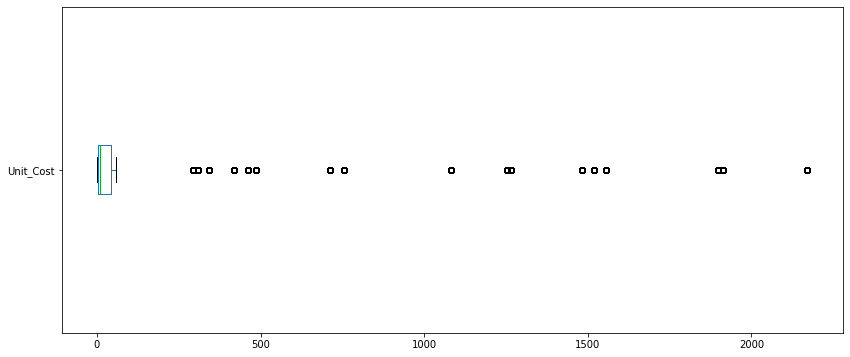

In [17]:
#visualization coming from matplotlib directly from pandas
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

Everything outside of box with wiskers is an outlier of our data

Text(0.5, 0, 'dollars')

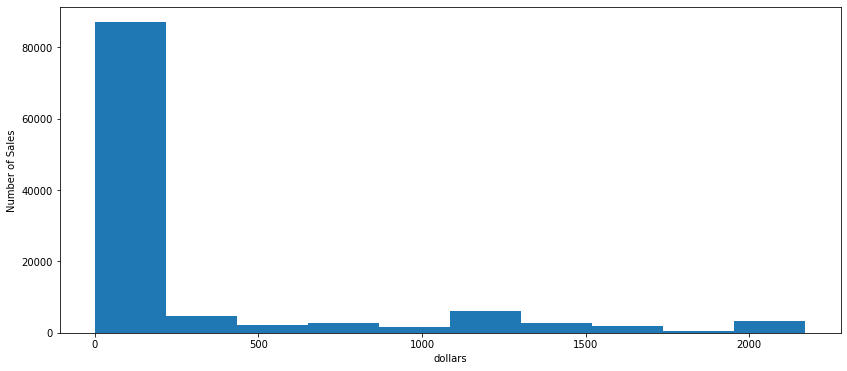

In [21]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

### Categorical analysis and visualization

Analysis of the Age_Group data

In [23]:
sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

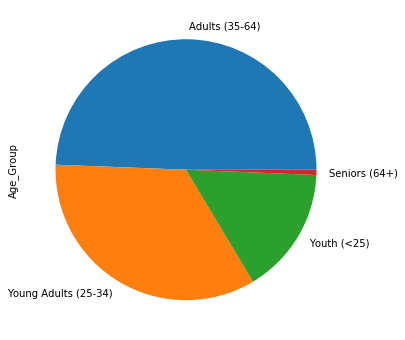

In [24]:
ax = sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

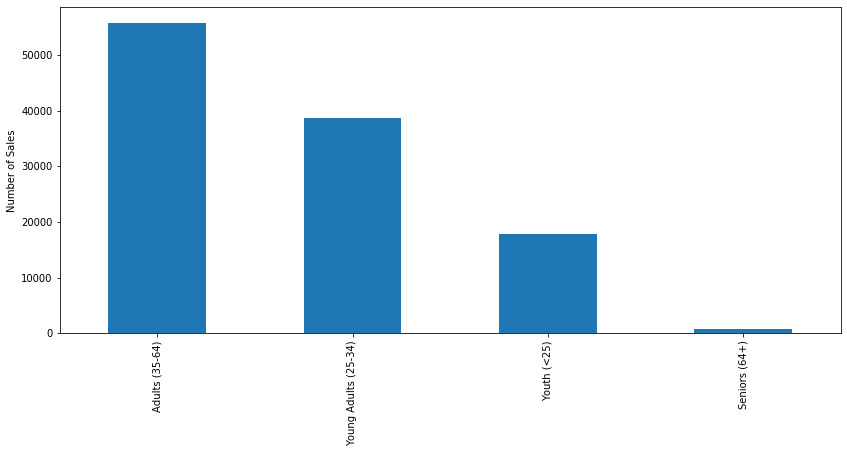

In [26]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

### Relationship between columns

Is there a significant correlation?
- highest correlation is 1

In [27]:
corr = sales.corr()
corr

Day      Year  Customer_Age  Order_Quantity  Unit_Cost  \
Day             1.000000 -0.007635     -0.014296       -0.002412   0.003133   
Year           -0.007635  1.000000      0.040994        0.123169  -0.217575   
Customer_Age   -0.014296  0.040994      1.000000        0.026887  -0.021374   
Order_Quantity -0.002412  0.123169      0.026887        1.000000  -0.515835   
Unit_Cost       0.003133 -0.217575     -0.021374       -0.515835   1.000000   
Unit_Price      0.003207 -0.213673     -0.020262       -0.515925   0.997894   
Profit          0.004623 -0.181525      0.004319       -0.238863   0.741020   
Cost            0.003329 -0.215604     -0.016013       -0.340382   0.829869   
Revenue         0.003853 -0.208673     -0.009326       -0.312895   0.817865   

                Unit_Price    Profit      Cost   Revenue  
Day               0.003207  0.004623  0.003329  0.003853  
Year             -0.213673 -0.181525 -0.215604 -0.208673  
Customer_Age     -0.020262  0.004319 -0.016013 -0.009326  
Order_Quantity   -0.515925 -0.238863 -0.340382 -0.312895  
Unit_Cost         0.997894  0.741020  0.829869  0.817865  
Unit_Price        1.000000  0.749870  0.826301  0.818522  
Profit            0.749870  1.000000  0.902233  0.956572  
Cost              0.826301  0.902233  1.000000  0.988758  
Revenue           0.818522  0.956572  0.988758  1.000000

([<matplotlib.axis.YTick at 0x118774e10>,
 <a list of 9 Text yticklabel objects>)

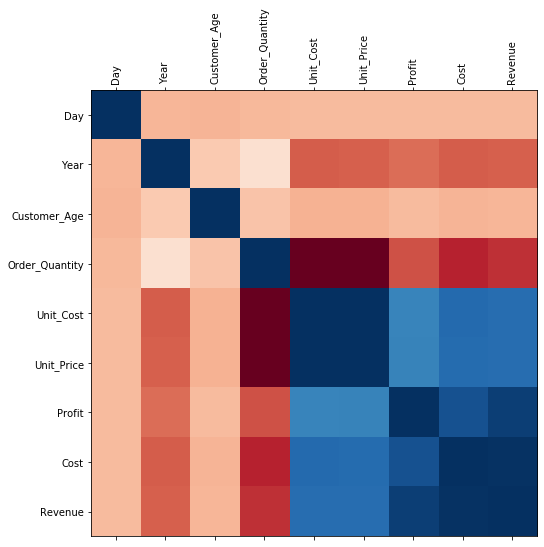

In [29]:
#plot of correlation. 'dark Blue' = close to 1. 'dark Red' = close to -1.
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

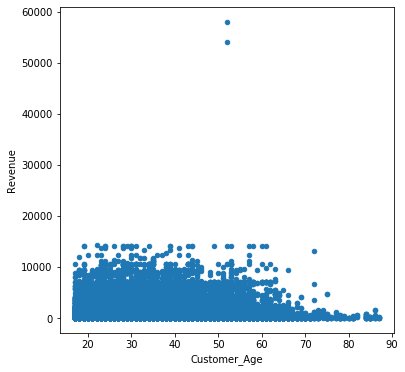

In [30]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

makes sense there is no clear correlation because it is pinkish on graph before

### Column Wrangling

Creating new columns or modifying existing ones

In [32]:
#adding and calculating new Revenue_per_Age column
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']
#showing data
sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

In [36]:
#adding and calculating new Calculated_Cost
sales['Calculated_Cost'] = sales['Order_Quantity']*sales['Unit_Cost']
sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

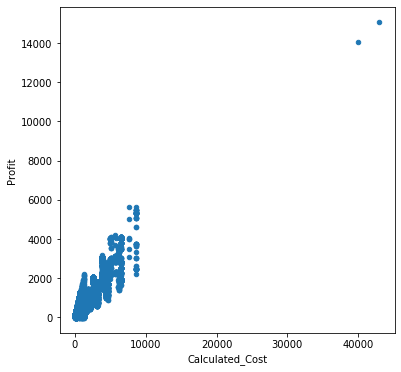

In [38]:
#relation between calculated cost and profit
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

#### Modifying all Unit Price values by adding 3% to them

In [39]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [40]:
sales['Unit_Price']*=1.03
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

### Selection and Indexing

want to maybe filter the data with some constraints

In [43]:
#sales in Washington
sales.loc[sales['State'] == 'Washington']

Date  Day      Month  Year  Customer_Age             Age_Group  \
80     2013-09-03    3  September  2013            51        Adults (35-64)   
81     2015-09-03    3  September  2015            51        Adults (35-64)   
86     2014-02-04    4   February  2014            46        Adults (35-64)   
87     2016-02-04    4   February  2016            46        Adults (35-64)   
96     2013-09-20   20  September  2013            32  Young Adults (25-34)   
...           ...  ...        ...   ...           ...                   ...   
112959 2016-02-16   16   February  2016            54        Adults (35-64)   
113012 2013-09-16   16  September  2013            20           Youth (<25)   
113013 2015-09-16   16  September  2015            20           Youth (<25)   
113014 2013-12-10   10   December  2013            20           Youth (<25)   
113015 2015-12-10   10   December  2015            20           Youth (<25)   

       Customer_Gender        Country       State Product_Category  ...  \
80                   F  United States  Washington      Accessories  ...   
81                   F  United States  Washington      Accessories  ...   
86                   M  United States  Washington      Accessories  ...   
87                   M  United States  Washington      Accessories  ...   
96                   M  United States  Washington      Accessories  ...   
...                ...            ...         ...              ...  ...   
112959               M  United States  Washington         Clothing  ...   
113012               F  United States  Washington         Clothing  ...   
113013               F  United States  Washington         Clothing  ...   
113014               F  United States  Washington         Clothing  ...   
113015               F  United States  Washington         Clothing  ...   

                    Product Order_Quantity  Unit_Cost  Unit_Price  Profit  \
80      Hitch Rack - 4-Bike              7         45      123.60     340   
81      Hitch Rack - 4-Bike              9         45      123.60     437   
86      Hitch Rack - 4-Bike              1         45      123.60      49   
87      Hitch Rack - 4-Bike              3         45      123.60     146   
96      Hitch Rack - 4-Bike              3         45      123.60     146   
...                     ...            ...        ...         ...     ...   
112959      Classic Vest, S             10         24       65.92     259   
113012      Classic Vest, M             30         24       65.92     778   
113013      Classic Vest, M             30         24       65.92     778   
113014      Classic Vest, M              8         24       65.92     207   
113015      Classic Vest, M              6         24       65.92     156   

        Cost  Revenue  Revenue_per_Age  Calculates_Cost  Calculated_Cost  
80       315      655        12.843137              315              315  
81       405      842        16.509804              405              405  
86        45       94         2.043478               45               45  
87       135      281         6.108696              135              135  
96       135      281         8.781250              135              135  
...      ...      ...              ...              ...              ...  
112959   240      499         9.240741              240              240  
113012   720     1498        74.900000              720              720  
113013   720     1498        74.900000              720              720  
113014   192      399        19.950000              192              192  
113015   144      300        15.000000              144              144  

[11264 rows x 21 columns]

In [44]:
#mean revenue of Adults(35-64)
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

In [47]:
#increase revenue by 10% to every sale in France
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

### Exercises

#### What is the mean of Customer_Age?

In [65]:
sales['Customer_Age'].mean()

35.91921157861212

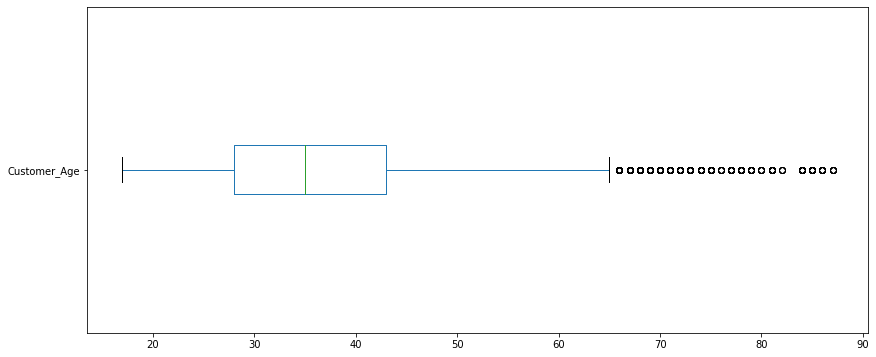

In [68]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

#### What is the mean of Order_Quantity?

In [54]:
sales['Order_Quantity'].mean()

11.901659648253654

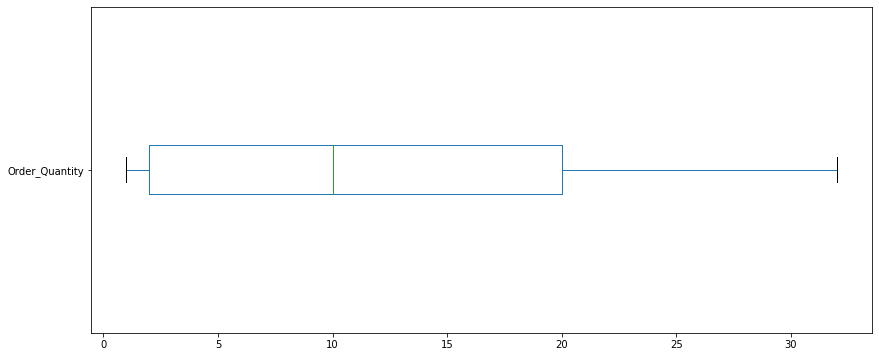

In [70]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

Text(0.5, 0, 'Order Quantity')

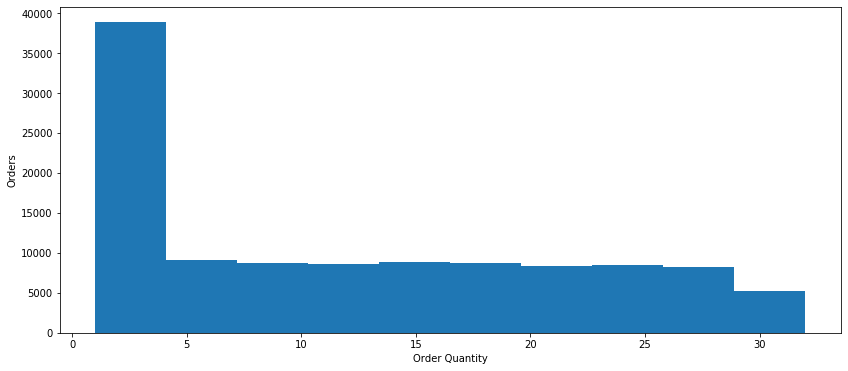

In [64]:
ax = sales['Order_Quantity'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Orders')
ax.set_xlabel('Order Quantity')

#### How many sales per year do we have?

In [73]:
sales['Year'].value_counts()

2016    29398
2014    29398
2015    24443
2013    24443
2012     2677
2011     2677
Name: Year, dtype: int64

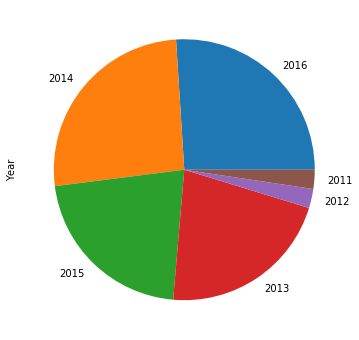

In [74]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

#### How many sales per month do we have?

In [75]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

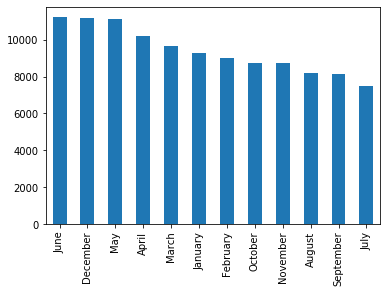

In [76]:
sales['Month'].value_counts().plot(kind='bar')

#### Which country has the most quantity of sales?

In [81]:
sales['Country'].value_counts()
#can see United States has most sales

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

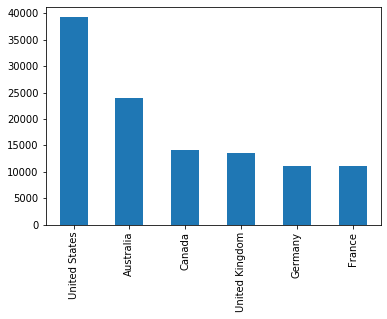

In [82]:
sales['Country'].value_counts().plot(kind='bar')

#### Create a list of every product sold

In [85]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

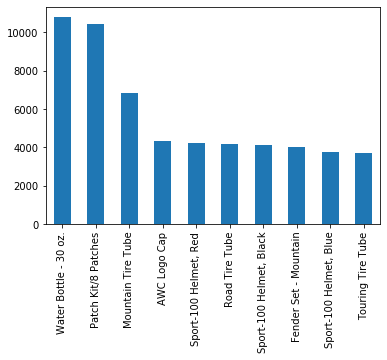

In [86]:
#chooses top 10 and plots bar
sales['Product'].value_counts().head(10).plot(kind='bar')

#### Can you see any relationship between Unit_Cost and Unit_Price?

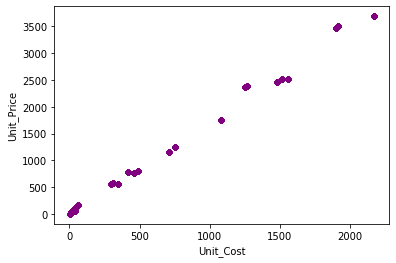

In [87]:
sales.plot(kind='scatter', x = 'Unit_Cost', y = 'Unit_Price', color = 'purple')

#### Can you see any relationship between Order_Quantity and Profit?

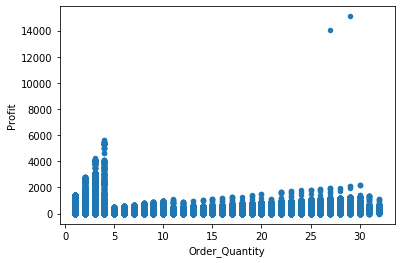

In [89]:
sales.plot(kind='scatter', x = 'Order_Quantity', y = 'Profit')

#### Relationship between Profit per Country?

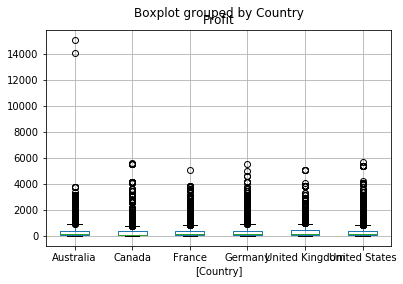

In [91]:
sales[['Profit', 'Country']].boxplot(by='Country')

#### Relationship between Custumer_Age per Country?

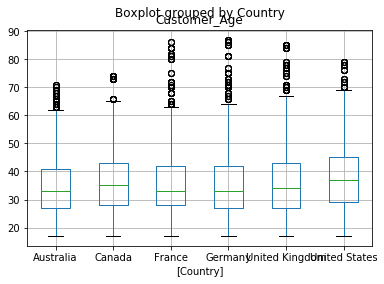

In [92]:
sales[['Customer_Age', 'Country']].boxplot(by='Country')

#### Increase 50 dollars revenue to every sale

In [93]:
sales['Revenue'] += 50

#### How many orders were made in Canada or France?

In [96]:
#.shape[0] tells you amount
sales.loc[(sales['Country']=='Canada') | (sales['Country']=='France')].shape[0]

25176

#### How many Bike Racks orders were made from Canada?

In [97]:
sales.loc[(sales['Country']=='Canada') & (sales['Sub_Category']=='Bike Racks')].shape[0]

104

#### How many orders were made in each region (state) of France?

In [100]:
france_states = sales.loc[sales['Country']=='France', 'State'].value_counts()
france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

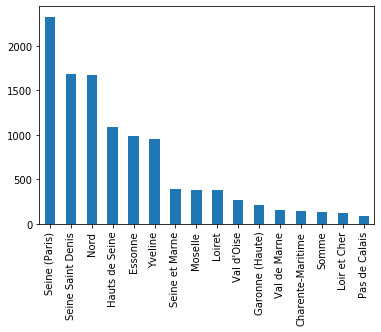

In [101]:
france_states.plot(kind='bar')

#### How many sales were made per category?

In [102]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

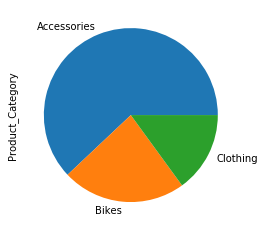

In [103]:
sales['Product_Category'].value_counts().plot(kind='pie')

#### How many orders were made per accessory sub-categories?

In [109]:
accessories = sales.loc[sales['Product_Category']=='Accessories', 'Sub_Category'].value_counts()
accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

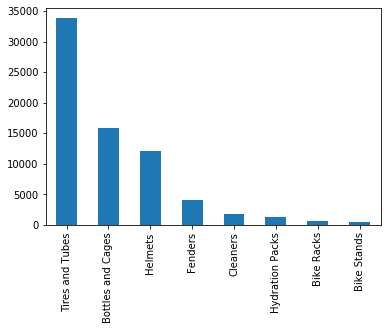

In [110]:
accessories.plot(kind='bar')

#### How many orders were made per bike sub-categories?

In [113]:
bike = sales.loc[sales['Product_Category']=='Bikes', 'Sub_Category'].value_counts()

In [114]:
bike

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

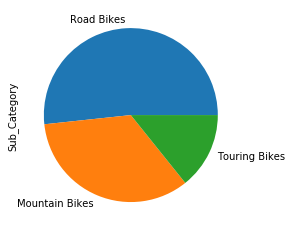

In [115]:
bike.plot(kind='pie')

#### Which gender has the most amount of sales?

In [118]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

#### How many sales with more than 500 in Revenue were made by men?

In [119]:
sales.loc[(sales['Customer_Gender']=='M') & (sales['Revenue']>500)].shape[0]

23646

#### Get the top-5 sales with highest revenue

In [121]:
sales.sort_values(['Revenue'], ascending=False).head(5)

Date  Day     Month  Year  Customer_Age       Age_Group  \
112073 2015-07-24   24      July  2015            52  Adults (35-64)   
112072 2013-07-24   24      July  2013            52  Adults (35-64)   
58741  2011-02-14   14  February  2011            41  Adults (35-64)   
58583  2011-08-22   22    August  2011            37  Adults (35-64)   
59153  2011-07-15   15      July  2011            23     Youth (<25)   

       Customer_Gender    Country       State Product_Category  ...  \
112073               M  Australia  Queensland         Clothing  ...   
112072               M  Australia  Queensland         Clothing  ...   
58741                M     France     Essonne            Bikes  ...   
58583                F     France        Nord            Bikes  ...   
59153                M     France        Nord            Bikes  ...   

                        Product Order_Quantity  Unit_Cost  Unit_Price  Profit  \
112073  Touring-1000 Yellow, 50             29       1482     2455.52   15096   
112072  Touring-1000 Yellow, 50             27       1482     2455.52   14055   
58741          Road-150 Red, 44              4       2171     3685.34    5056   
58583          Road-150 Red, 44              4       2171     3685.34    3767   
59153          Road-150 Red, 56              4       2171     3685.34    3767   

         Cost    Revenue  Revenue_per_Age  Calculates_Cost  Calculated_Cost  
112073  42978  58124.000      1116.807692            42978            42978  
112072  40014  54119.000      1039.788462            40014            40014  
58741    8684  18337.940       335.121951             8684             8684  
58583    8684  16622.281       336.513514             8684             8684  
59153    8684  16622.281       541.347826             8684             8684  

[5 rows x 21 columns]

In [125]:
sales.loc[sales['Revenue'].max()]

Date                   2014-03-03 00:00:00
Day                                      3
Month                                March
Year                                  2014
Customer_Age                            33
Age_Group             Young Adults (25-34)
Customer_Gender                          M
Country                            Germany
State                  Nordrhein-Westfalen
Product_Category                     Bikes
Sub_Category                Mountain Bikes
Product             Mountain-100 Black, 44
Order_Quantity                           1
Unit_Cost                             1898
Unit_Price                         3476.25
Profit                                1038
Cost                                  1898
Revenue                               2986
Revenue_per_Age                    88.9697
Calculates_Cost                       1898
Calculated_Cost                       1898
Name: 58124, dtype: object

#### Mean Order_Quantity of orders with more than 10K in revenue

In [127]:
condition = sales['Revenue'] > 10000
sales.loc[condition, 'Order_Quantity'].mean()

3.6333333333333333

#### How many orders in May 2016?

In [128]:
condition = (sales['Month']=='May') & (sales['Year']==2016)
sales.loc[condition].shape[0]

5015

#### How many orders between May and July of 2016?

In [132]:
condition = (sales['Month'].isin(['May', 'June', 'July'])) & (sales['Year']==2016)

sales.loc[condition].shape[0]

12164

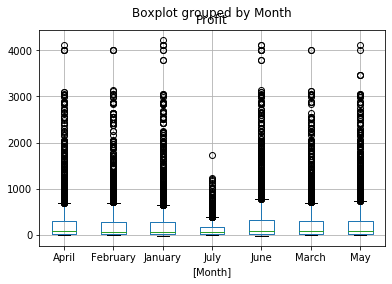

In [133]:
profit_2016 = sales.loc[sales['Year']==2016, ['Profit', 'Month']]
profit_2016.boxplot(by='Month')

#### Add 7.2% TAX on every sale Unit_Price within the United States

In [136]:
sales.loc[sales['Country']=='United States', 'Unit_Price'] *= 1.072